In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Dataset

In [33]:
dataset_path = "./dataset/"

train_data = tf.keras.utils.audio_dataset_from_directory(
    dataset_path,
    batch_size=4,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    output_sequence_length=48000,
    ragged=False,
    label_mode="categorical",
    labels="inferred",
    sampling_rate=None,
    seed=59
)

validation_data = tf.keras.utils.audio_dataset_from_directory(
    dataset_path,
    batch_size=4,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    output_sequence_length=48000,
    ragged=False,
    label_mode="categorical",
    labels="inferred",
    sampling_rate=None,
    seed=59
)

Found 1847 files belonging to 22 classes.
Using 1478 files for training.
Found 1847 files belonging to 22 classes.
Using 369 files for validation.


Model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=80, strides=16, activation="relu", input_shape=(48000, 1)),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(22, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 2996, 32)       │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 749, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 747, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 186, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 184, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 46, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 44, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │        15,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,766 (155.34 KB)

 Trainable params: 39,766 (155.34 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Train

In [10]:
history = model.fit(
    train_data, 
    validation_data=validation_data, 
    epochs=30)

Epoch 1/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.1422 - loss: 2.7917 - val_accuracy: 0.3306 - val_loss: 1.9957
Epoch 2/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 47s 126ms/step - accuracy: 0.4446 - loss: 1.6666 - val_accuracy: 0.5962 - val_loss: 1.3482
Epoch 3/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 47s 128ms/step - accuracy: 0.6959 - loss: 0.9186 - val_accuracy: 0.7642 - val_loss: 0.8195
Epoch 4/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 48s 130ms/step - accuracy: 0.8068 - loss: 0.5550 - val_accuracy: 0.7886 - val_loss: 0.6913
Epoch 5/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 48s 130ms/step - accuracy: 0.8566 - loss: 0.4460 - val_accuracy: 0.8130 - val_loss: 0.6032
Epoch 6/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 49s 133ms/step - accuracy: 0.8605 - loss: 0.4007 - val_accuracy: 0.8211 - val_loss: 0.6937
Epoch 7/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 49s 131ms/step - accuracy: 0.8955 - loss: 0.3292 - val_accuracy: 0.8238 - val_loss: 0.5519
Epoch 8/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 52s 140ms/step - accuracy: 0.9138 - loss: 0

In [13]:
model.save("weights/audio_classification.h5")

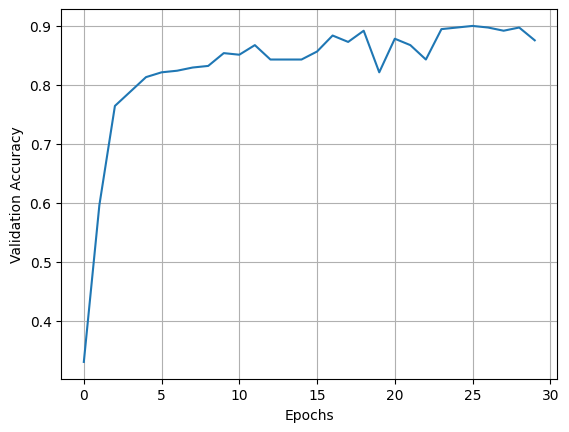

In [25]:
plt.plot(history.history["val_accuracy"])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid()
plt.show()
plt.show()

In [17]:
loss , accuracy = model.evaluate(validation_data)
print("validation loss:" , loss)
print("validation accuracy:" ,accuracy)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8788 - loss: 0.4740
validation loss: 0.4309239983558655
validation accuracy: 0.8753387331962585
